# Setup

In [1]:
# Imports
import os
import os.path as osp

import joblib
import numpy as np
import gym
import pandas as pd
import matplotlib.pyplot as plt

import pirl
from pirl import config, experiments

from analysis import common

In [186]:
# Config
experiment_dirs = ['../data/experiments/mountain-car-side-metalearn-20180706_154854-d25020c6f85e7b10775b5e3972eacceebfe9b6af/',
                   '../data/experiments/mountain-car-color-metalearn-20180706_130745-d25020c6f85e7b10775b5e3972eacceebfe9b6af/']

# Value difference

In [187]:
algo_pattern = '(.*)'
env_pattern = '(.*)'
dfs = [common.load_value(x, algo_pattern, env_pattern)
       for x in experiment_dirs]
df = pd.concat(dfs, axis=0)
values = common.aggregate_value(df)
ci = common.plot_ci(values)

/home/adam/bin/anaconda3/envs/mypirl/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [188]:
idx = (df.index.get_level_values('seed') <= 4) & (df.index.get_level_values('m').isin([1,5,100]))
df.loc[idx].xs('mean', level='type').groupby(['env', 'n', 'm', 'eval']).max()


airl random short  airl sa short  airl so short  airlp random short  airlp so separate short  expert  ppo cts short
env                                                n   m   eval                                                                                                                              
pirl/MountainCarContinuous-2-blue-0-0.05-v0        100 1   irl                      -493.78          71.29          53.93               15.66                   -13.65   93.63          93.63
                                                           ppo_cts_short              19.58        -113.11          48.95               23.83                    -9.37   93.63          93.63
                                                       5   irl                      -464.97          45.38          70.07              -29.86                    17.21   93.63          93.63
                                                           ppo_cts_short              65.04       -1243.84          80.37               52.02                     8.90   93.63          93.63
                                                       100 irl                      -516.67          51.63          19.64               -8.41                    -0.34   93.63          93.63
                                                           ppo_cts_short              45.81       -3326.81          69.95               -6.37                    14.32   93.63          93.63
pirl/MountainCarContinuous-2-left-target-0-0.05-v0 100 1   irl                      -498.14            NaN          81.83               73.77                    82.51   92.75          92.75
                                                           ppo_cts_short              84.67            NaN          81.03               76.90                    70.78   92.75          92.75
                                                       5   irl                      -503.98            NaN          82.88               80.19                    80.94   92.75          92.75
                                                           ppo_cts_short              78.97            NaN          82.18               76.33                    35.20   92.75          92.75
                                                       100 irl                      -510.58            NaN          76.43               81.53                    81.32   92.75          92.75
                                                           ppo_cts_short              81.72            NaN          81.54               72.34                    79.41   92.75          92.75
pirl/MountainCarContinuous-2-red-0-0.05-v0         100 1   irl                      -495.17          33.82          52.11               32.25                    20.25   93.91          93.91
                                                           ppo_cts_short              27.53         -99.91          65.31                8.83                     7.04   93.91          93.91
                                                       5   irl                      -506.88          63.36          69.81               18.86                    25.13   93.91          93.91
                                                           ppo_cts_short              25.06       -3645.52          25.15               -7.00                     5.30   93.91          93.91
                                                       100 irl                      -474.73          48.62          77.59               22.93                   -17.26   93.91          93.91
                                                           ppo_cts_short              25.16       -3319.90          32.50              -13.13                   -11.65   93.91          93.91
pirl/MountainCarContinuous-2-right-target-0-0.0... 100 1   irl                      -485.92            NaN          82.08               81.96                    22.80   93.22          93.22
                                                           ppo_cts_short            

# Figures

In [270]:
import collections

pretty_envs = {
    'red': 'red', 
    'blue': 'blue',
    'left-target': 'left', 
    'right-target': 'right'
}
pretty_envs = {'pirl/MountainCarContinuous-2-{}-0-0.05-v0'.format(k): v.capitalize()
               for k, v in pretty_envs.items()}

pretty_algos = collections.OrderedDict([
    ('airl random short', 'Single Random'),
    ('airl so short', 'Single Normal'),
    ('airlp random short', 'Meta Random'),
    ('airlp so separate short', 'Meta Task-specific'),
    ('ppo cts short', 'PPO'),
])

pretty_eval = {
    'irl': 'IRL',
    'ppo_cts_short': 'Reoptimized',
}

eval_algos = collections.OrderedDict([
    ('IRL', ['Single Normal', 'Meta Random', 'Meta Task-specific', 'PPO']),
    ('Reoptimized', ['Single Random', 'Single Normal', 'Meta Random', 'Meta Task-specific', 'PPO']),
])

best_of_seeds = 5
ms = [1, 5, 100]

figs_dir = osp.join('../../population-irl-paper', 'figs')

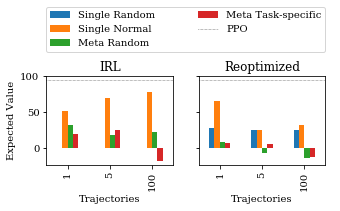

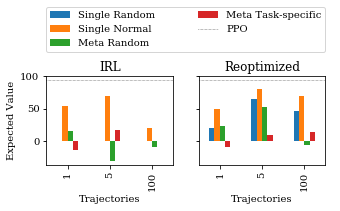

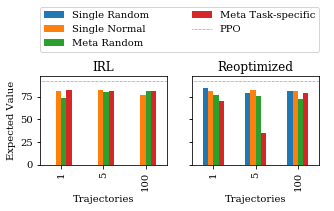

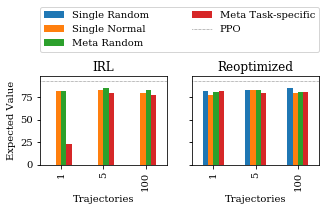

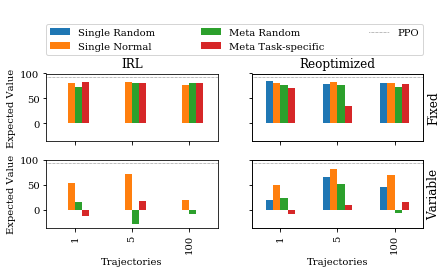

In [274]:
import itertools

# Filter
idx = ((df.index.get_level_values('seed') < best_of_seeds) & 
       (df.index.get_level_values('m').isin(ms)))
val = df.loc[idx]
# Take maximum across seeds
val = val.stack().unstack('seed').max(axis=1).unstack(-1)
# n should be fixed, get rid of it
val.index = val.index.droplevel('n')
assert val.index.is_unique

val = val.rename(columns=pretty_algos).loc[:, list(pretty_algos.values())]
val = val.rename(index=pretty_envs, level=0).loc[list(pretty_envs.values()), :]
val = val.rename(index=pretty_eval, level='eval')

xs = []
for eval_type, algos in eval_algos.items():
    xs.append(val.loc[val.index.get_level_values('eval') == eval_type, algos])
val = pd.concat(xs, sort=False).loc[:, list(pretty_algos.values())]
    
with plt.style.context([common.style('default'), common.style('twocol-skinny')]):
    for env in pretty_envs.values():
        subset = val.xs(env, level='env')
        fig = common.value_multi_bar_chart(subset, levels=('eval',),
                                           relative='PPO', whiskers=False, ncol=2)
        out_path = osp.join(figs_dir, 'mountaincar', '{}.pdf'.format(env))
        fig.savefig(out_path, bbox_inches='tight')
    
with plt.style.context([common.style('default'), common.style('twocol-tall')]):
    envs = {'Left': 'Fixed', 'Blue': 'Variable'}
    subset = val.rename(index=envs, level='env')
    vals = (list(envs.values()), list(eval_algos.keys()))
    fig = common.value_multi_bar_chart(subset, levels=('env', 'eval'), vals=vals,
                                       relative='PPO', whiskers=False,
                                       ncol=3, legend_height=0.4, vertical_pad=0.3)
    out_path = osp.join(figs_dir, 'mountaincar', 'combined.pdf')
    fig.savefig(out_path, bbox_inches='tight')

# Policy rollout

In [ ]:
def expert_cached_value(rl, env_name, pol_discount=0.99, eval_discount=1.00, seed=1234, episodes=100):
    '''Rollout a cached expert policy for episodes.
       WARNING: This will be slow or just break if policy is not in cache!'''
    gen_policy, _sample, compute_value = config.RL_ALGORITHMS[rl]
    policy, value = experiments._train_policy(rl, pol_discount, env_name, seed, None)
    vmean, vse = value
    print('Cached value: {:.3f} +/- {:.3f}'.format(vmean, 1.96 * vse))
    
    env = gym.make(env_name)
    rmean, rse = compute_value(env, policy, eval_discount, num_episodes=episodes, seed=seed)
    print('Rollout value: {:.3f} +/- {:.3f}'.format(rmean, 1.96 * rse))
    return (vmean, vse), (rmean, rse)

def _policy_value(results_dir, rl, env_name, pol_discount, eval_discount, episodes, seed):
    _gen_policy, _sample, compute_value = config.RL_ALGORITHMS[rl]
    fname = osp.join(results_dir, 'policy.pkl')
    print('Loading policy from ', fname)
    policy = joblib.load(fname)
    env = gym.make(env_name)
    
    mean, se = compute_value(env, policy, eval_discount, num_episodes=episodes, seed=seed)
    print('Rollout value: {:.3f} +/- {:.3f}'.format(mean, 1.96 * se))
    return mean, se

def expert_value(experiment_dir, rl, env_name, pol_discount=0.99, eval_discount=1.00, episodes=100, seed=1234):
    results_dir = osp.join(experiment_dir, 'expert', env_name, rl)
    return _policy_value(results_dir, rl, env_name, pol_discount, eval_discount, episodes, seed)

def irl_eval_value(experiment_dir, irl_name, num_traj, rl, env_name, pol_discount=0.99, eval_discount=1.00, episodes=100, seed=1234):
    results_dir = osp.join(experiment_dir, 'eval', env_name, 
                           '{}:{}:{}'.format(irl_name, num_traj, num_traj), rl)
    return _policy_value(results_dir, rl, env_name, pol_discount, eval_discount, episodes, seed)
    
def irl_value(experiment_dir, irl_name, env_name, num_traj, eval_discount=1.00, episodes=100):
    _irl_algo, _reward_wrapper, compute_value = experiments.make_irl_algo(irl_name)
    irl_dir = osp.join(experiment_dir, 'irl', irl_name)
    if not os.path.exists(irl_dir):
        raise FileNotFoundError("No result directory {}".format(irl_dir))
    
    pop_fname = osp.join(irl_dir, str(num_traj), 'policies.pkl')
    sin_fname = osp.join(irl_dir, env_name, str(num_traj), 'policy.pkl')
    if os.path.exists(pop_fname):
        policies = joblib.load(pop_fname)
        print(policies.keys())
        policy = policies[env_name]
    elif os.path.exists(sin_fname):
        policy = joblib.load(sin_fname)
    else:
        raise FileNotFoundError("Neither {} or {} exists".format(pop_fname, sin_fname))
    
    env = gym.make(env_name)
    mean, se = compute_value(env, policy, discount=eval_discount, num_episodes=episodes)
    print('Rollout value: {} +/- {}'.format(mean, 1.96 * se))

In [ ]:
expert_cached_value('ppo_cts', 'Reacher-v2', episodes=100)

In [ ]:
expert_value(experiment_dir, 'ppo_cts', 'Reacher-v2', episodes=500, seed=1234)

In [ ]:
irl_value(experiment_dir, 'airl', 'Reacher-v2', 1000, episodes=100)

# Visualizing rewards (gridworld only)

In [ ]:
def show_heatmaps(irl_algo, kind='inline', out_dir=None, shape=(9,9), **kwargs):
    data = pd.read_pickle(osp.join(experiment_dir, 'results.pkl'))
    rewards = data['rewards'][irl_algo]
    if kind in ['inline', 'pdf']:
        figs = common.gridworld_heatmap(rewards, shape)
        if out_dir is None:
            for fig in figs:
                display(fig[1])
        else:
            common.save_figs(figs, out_dir)
    elif kind == 'movie':
        common.gridworld_heatmap_movie(out_dir, rewards, shape)
    else:
        assert False

In [ ]:
irl_algos = ['mce', 'mcep_reg1e0']
for irl in irl_algos:
    show_heatmaps(irl, kind='inline', shape=(4,4))
    #show_heatmaps(irl, kind='movie', out_dir='figs/jungle/movies/' + irl)
    #show_heatmaps(irl, kind='movie', out_dir='figs/jungle/' + irl)

# Loss curve (PPO only)

In [ ]:
def ppo_progress(results_dir):
    path = osp.join(results_dir, 'progress.csv')
    df = pd.read_csv(path)
    df = df.set_index('serial_timesteps')
    return df

def expert_ppo_progress(experiment_dir, env_name, rl_name):
    results_dir = osp.join(experiment_dir, 'expert', 
                       experiments.sanitize_env_name(env_name),
                       rl_name)
    return ppo_progress(results_dir)

In [ ]:
envs = ['InvertedPendulum-v2', 'InvertedDoublePendulum-v2', 'Reacher-v2']
for env in envs:
    df = expert_ppo_progress(experiment_dir, env, 'ppo_cts')
    plt.figure()
    df['eprewmean'].plot()
    print(df['eprewmean'].max())
    plt.title(env)

# Evaluate checkpoint

In [ ]:
def load_checkpoint(results_dir, checkpoint_num=None):
    checkpoint_dir = osp.join(results_dir, 'checkpoints')
    if checkpoint_num is None:
        checkpoint_num = max(os.listdir(checkpoint_dir))
    checkpoint_fname = osp.join(checkpoint_dir, checkpoint_num)
    print('Loading from ', checkpoint_fname)
    policy = joblib.load(checkpoint_fname)
    
    return policy

def ppo_value2(results_dir, rl, env_name, pol_discount, eval_discount, episodes):
    _gen_policy, _sample, compute_value = config.RL_ALGORITHMS[rl]
    fname = osp.join(results_dir, 'policy.pkl')
    print('Loading policy from ', fname)
    policy = joblib.load(fname)
    env = gym.make(env_name)
    
    mean, se = compute_value(env, policy, eval_discount, num_episodes=episodes)
    print('Rollout value: {:.3f} +/- {:.3f}'.format(mean, 1.96 * se))
    return mean, se

def ppo_value(policy, env_name, episodes, seed=1234):
    _, _, compute_value = config.RL_ALGORITHMS['ppo_cts']
    env = gym.make(env_name)
    mean, se = compute_value(env, policy, 1.00, num_episodes=episodes, seed=seed)
    print('Rollout value: {:.3f} +/- {:.3f}'.format(mean, 1.96 * se))

In [ ]:
policy = load_checkpoint(osp.join(experiment_dir, 'expert/InvertedPendulum-v2/ppo_cts'), '00488')
ppo_value(policy, 'InvertedPendulum-v2', 500, 1234)